#### Sistemas de arquivos distribuídos

Anteriormente o processamento era feito em hardware especializado (processadores, cache, discos, e memória)

Atualmente a Web e o BigData exigem um processamento intensivo, mas não necessariamente focadoo em hardware especializado.

- Computadores em rede (nós) - racks (8 a 64)
- Operações mais independentes
- Cada nó é um 'commodity hardware' (Custo reduzido)
- Tolerante a falhas (Distribute File System - DFS)
- Sistemas de arquivos especializados;

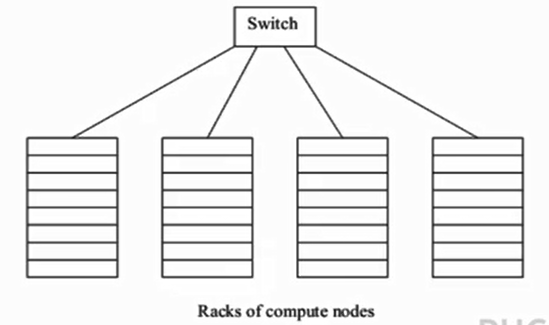

Um único arquivo é apresentado, porém seu armazenamento é feito de forma distribuída.

Os cálculos devem ser divididos entre os nós e se um falhar não deve afetar todo o processamento e deve ser reprocessado apenas aquela etapa.

Quanto maior o número de *racks* ou nós, maior a probabilidade de falhas

##### Distribute File System - DFS

- Arquivos devem ser grandes (GB pelo menos)
- Os arquivos raramente são atualizados (write-once-read-many)
- As informações dos blocos e replicas é controlado via metadados com figura central no cluster: 'name node' ou 'master node'
- Os outros nós são chamados de 'data node' ou 'slave node'
- O 'name node' periodicamente recebe um relatório de blocos do 'data node'

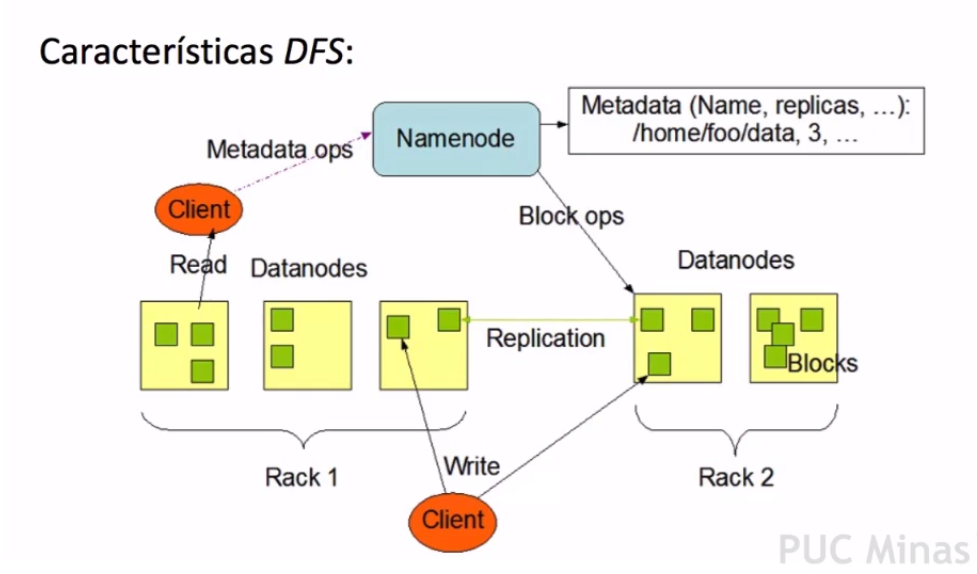

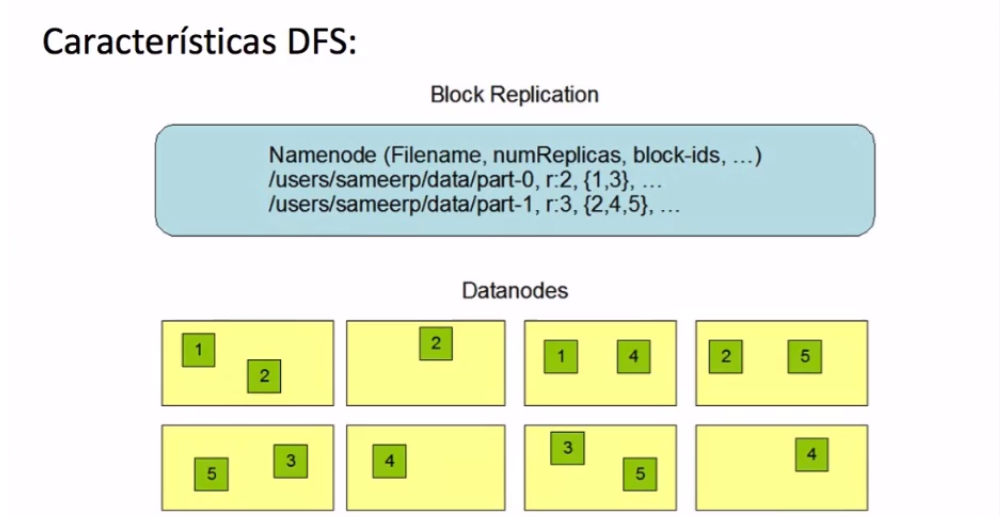

Comandos:

- hadoop fs -ls /: Lista diretório raiz
- hadoop fs -mkdir /dados: Criar diretório
- hadoop fs -rmr /dados/bigdata: Apaga diretório
- hadoop fs -put /var/log/boot.log /dados/bigdata: Copia obj local para o HDFS
- hadoop fs -cp /apps/hive/warehouse/sample_07/sample_07 /dados/bigdata: Copia arquivos pela estrutura do hadoop
- haddop fs -get /dados/bigdata/sample_07 /home/hdfs/: Copia arquivo do HDFS para local

Portal HUE:

http://127.0.0.1:8000/about/

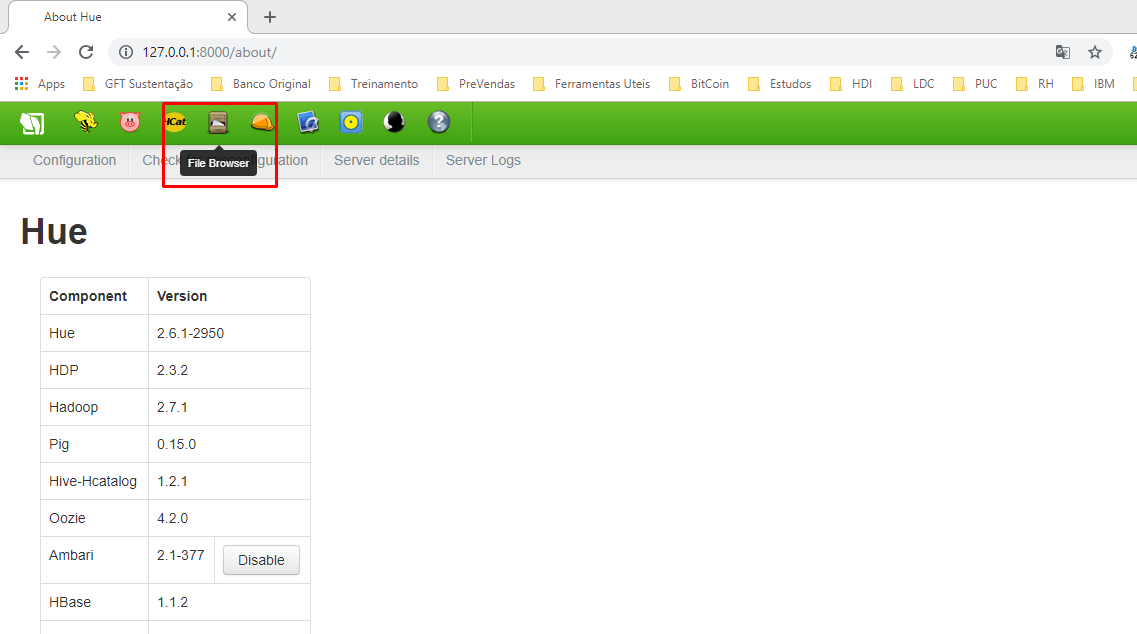

Esta ferramenta se chama HUE e permite interações com o cluster hadoop. Inclue várias ferramentas de fácil utilização, dentre elas: Pig, Hive, Hbase, Jobs Map Reduce, dentre outros.

As aplicações HUE são totalmente Web, permitindo que se faça execute as aplicações de acordo com os botões abaixo:

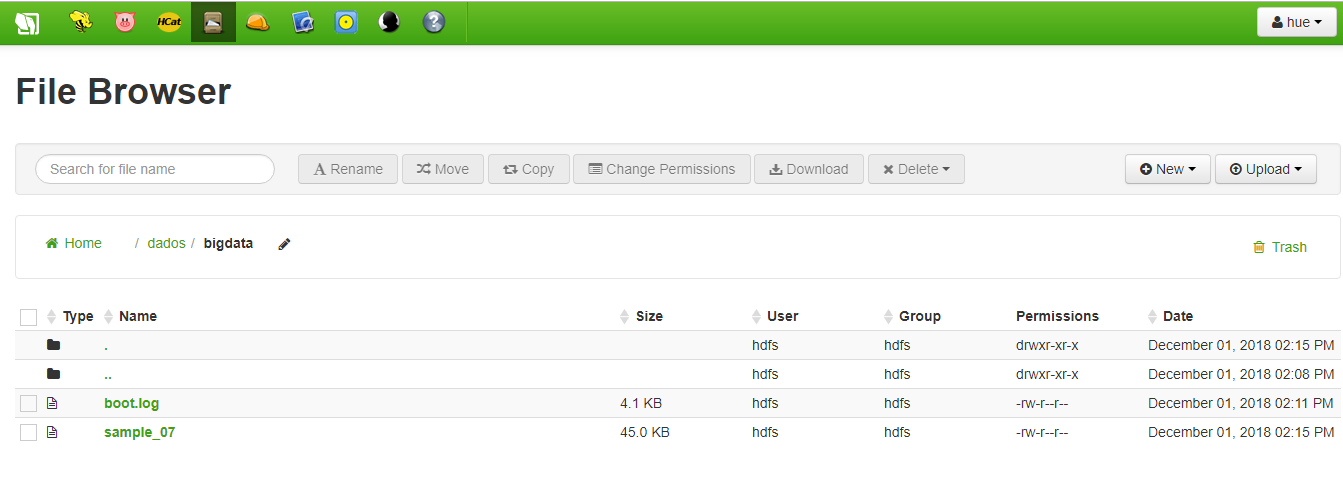

### Map Reduce

OBS: Existe um artigo de 2014 que fala sobre o algoritmo Map Reduce

A ideia é derivada da programação funcional:
- Map e Reduce são dois teipos de funções:

    - _Map_: Aplica uma função ou operação para cada elemento em uma lista; Ex. Multiplicação por 2;
    [1,2,3,4] -> [2,4,6,8]
    Não altera o dado original, evita o 'Shared Data' e pode ser executado de forma paralela;
    
    -_Reduce_: É uma função de agrupamento ou compressão, resulta em um único valor, pode ser executada de forma paralela
    Pode ser utilizada sempre que houver uma lista.

- Maior número de máquinas, melhor o tempo de resposta
- Reduce só inicia quando o Map é finalizado
- Após o MAP as chaves são ordenadas e agrupadas (NameNode)

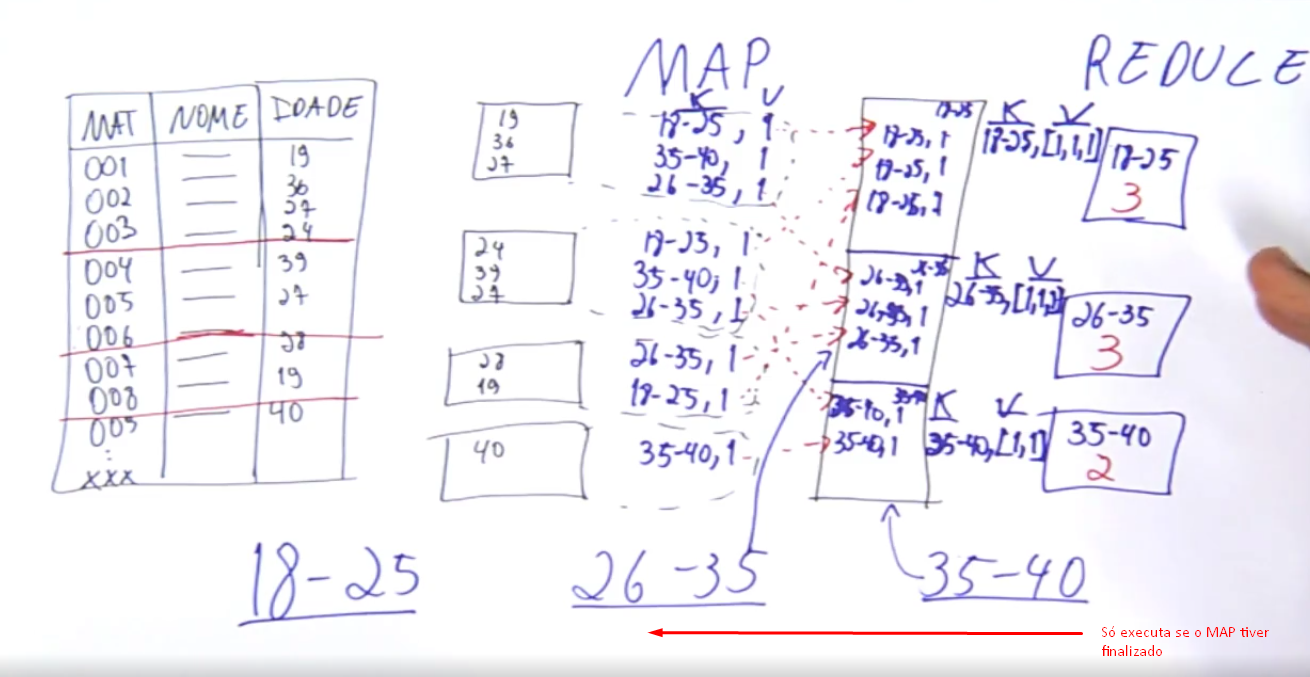

### Hadoop - Algoritmo Map Reduce Parte 2

Passos de execução:

- Um arquivo é armazenado no DFS com vários blocos em vários nós e racks;
- Um conj. de tarefas Maps é criada, para cada Map são executados um ou mais blocos, o resuktado é uma estrutura de chave e valor ou tuplas;
- As estruturas são coletadas pelo controlador master e ordenadas;
- As chaves são agrupadas e armazenadas (Master Node)
- As tarefas do tipo Reduce vão agrupar os dados pelas chaves;

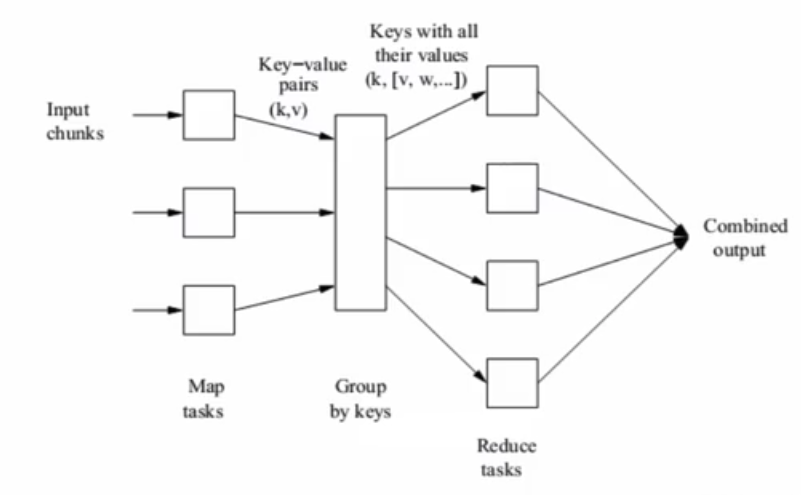

#### Tarefas Map

- Um bloco no DFS possui vários "membros" que serão processados. Cada membro só pertence a apenas 1 bloco;
- A estrutura chave valor é importante pois permite a execução de várias tarefas Map em paralelo
- A função Map é responsável por coverter os dados para a estrutura chave valor;
- Chaves não são 'chave', no sentido escrito, não precisam ser únicas

#### Tarefas Reduce

- Agrupamento e agregação
- São realizadas de forma indepente do que as funções Map e Reduce façam;
- O 'name-node' controla esses processos:
    - O Número de tarefas reduce são definidas previamente;
    - cria uma função hash (0 até r - 1) que é aplicadas nas chaves;
    - Cada chave é processada em uma das máquinas por arquivos locais (NameNode);
    - Faz merge dos arquivos que farão a tarefa de Reduce (Master Node)
    
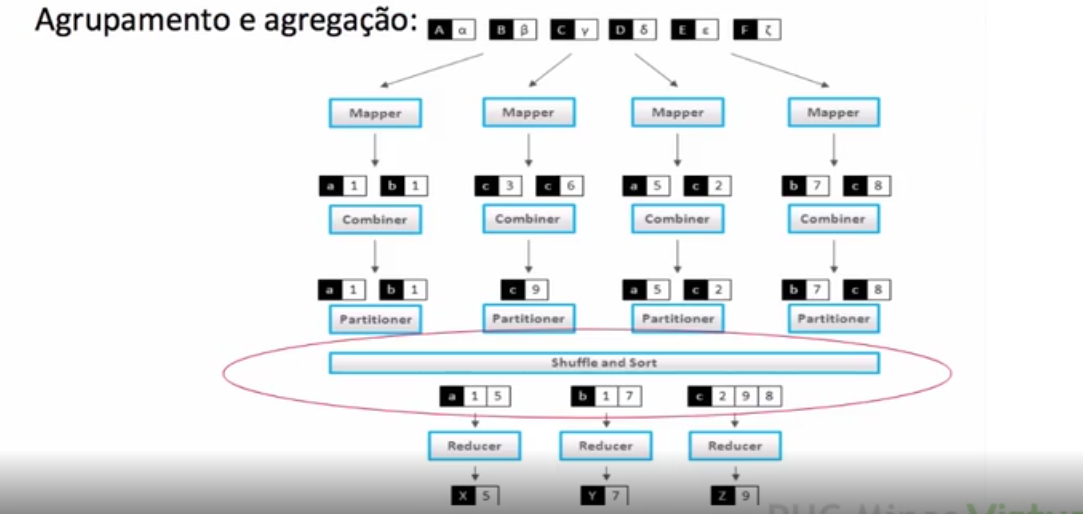

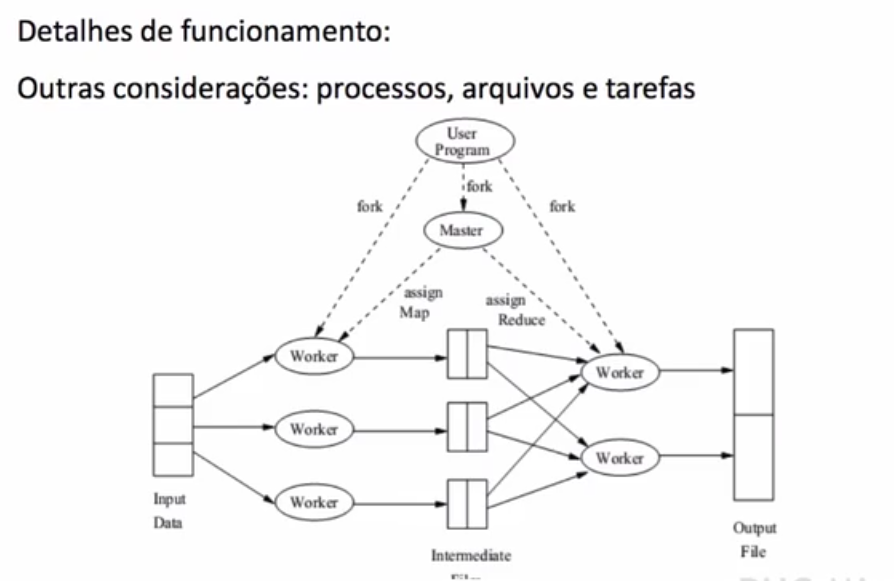

##### Outras considerações:

- O Name Node é responsável pela criação das tarefas de Map e Reduce nos DataNodes;
- O ideal é que se crie uma tarefa Map para cada bloco;
- O número de tarefas reduce deve ser mais reduzido, muitas funções de reduce sig que teremos um baixo agrupamento e compreesão dos dados(O numero mais reeduzido é melhor);
- O 'nameNode' acompanha toda execução das tarefas (em espera, executando, completo), assim que o processo termina, o NameNode comunica a finalização para o NameNode; - Esse processo é transparente para nós
- Os Reduces recebem os arquivos intermediários para realizar o merge dos mesmos e aplicar a função reduce.